# Import modules and data

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/KPMG/kpmg_data.xlsx'
sheet_names = pd.ExcelFile(file_path).sheet_names
sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [4]:
# Transactions
df_transactions = pd.read_excel(file_path, sheet_name='Transactions', header=1)
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
# NewCustomerList
df_customers = pd.read_excel(file_path, sheet_name='NewCustomerList', header=1)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

<ipython-input-5-3bf69008602a>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_customers = pd.read_excel(file_path, sheet_name='NewCustomerList', header=1)


In [6]:
# CustomerDemographic
df_demographic= pd.read_excel(file_path, sheet_name='CustomerDemographic', header=1)
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

<ipython-input-6-7f605999b30a>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_demographic= pd.read_excel(file_path, sheet_name='CustomerDemographic', header=1)


In [7]:
# CustomerAddress
df_address= pd.read_excel(file_path, sheet_name='CustomerAddress', header=1)
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# 1. Data Quality Assessment

## Transactions

In [6]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [8]:
# no duplicates in the dataset
df_transactions.duplicated().sum()

0

In [9]:
df_transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [10]:
df_transactions['order_status'].value_counts(normalize=True)

Approved     0.99105
Cancelled    0.00895
Name: order_status, dtype: float64

<Axes: xlabel='product_line', ylabel='Count'>

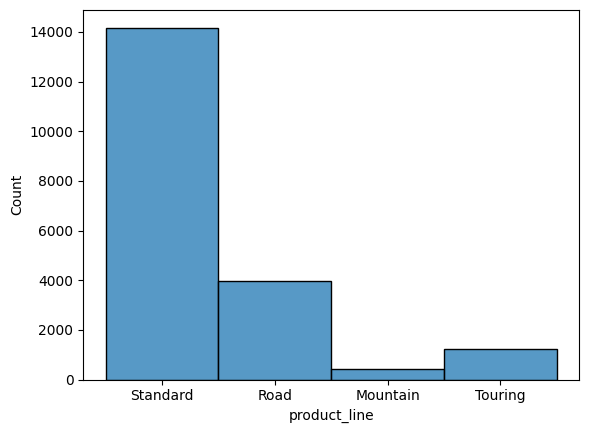

In [11]:
sns.histplot(data=df_transactions, x='product_line', binwidth=1)

What do we need to change:
* the product_first_sold date is numbers instead of dates
* handle blank values

In [12]:
# changing datatype for the column
df_transactions_clean = df_transactions.copy()
df_transactions_clean['product_first_sold_date_clean'] = pd.to_datetime(df_transactions_clean['product_first_sold_date'],unit='D', origin='1899-12-30')
df_transactions_clean.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_first_sold_date_clean
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2015-08-10


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

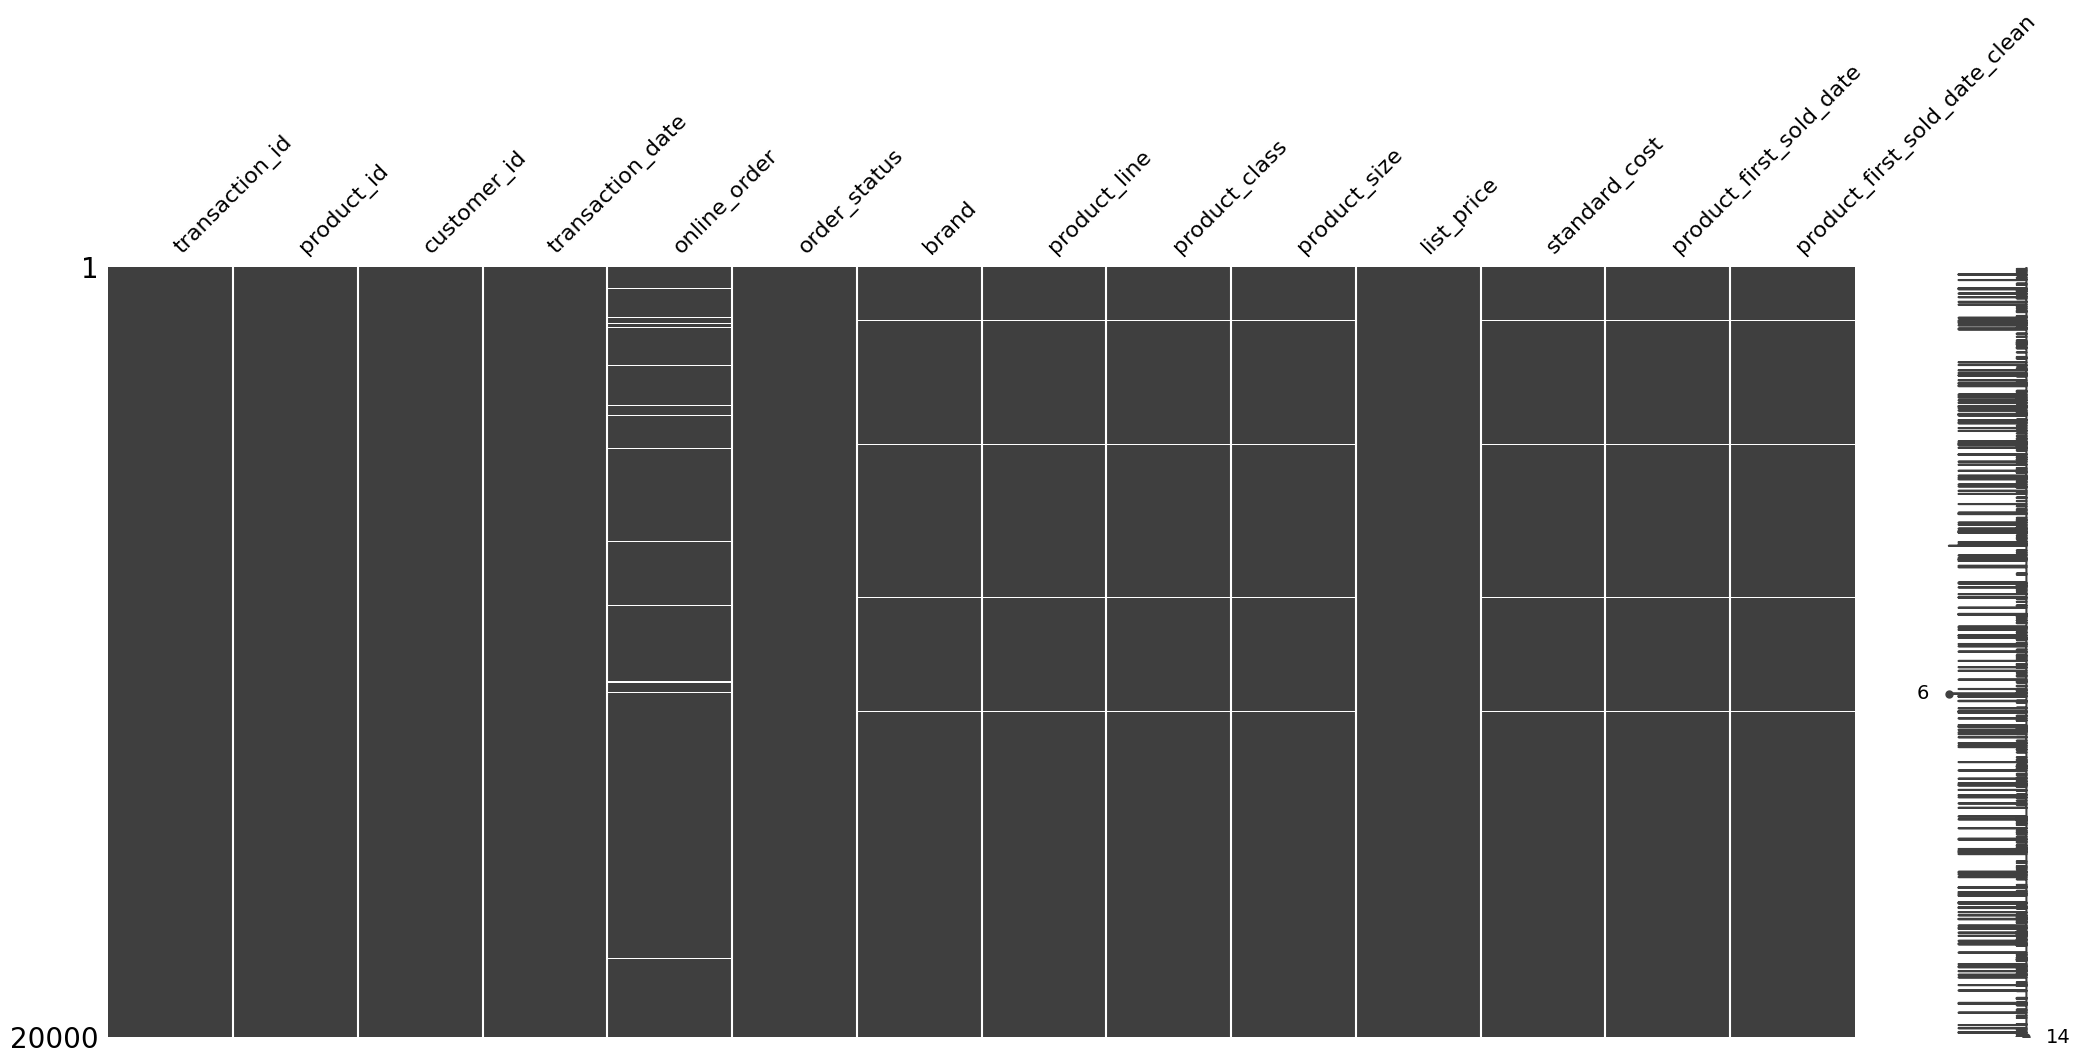

In [13]:
msno.matrix(df_transactions_clean.sort_values(by=['transaction_date']))
plt.plot

I removed 197 records where there is no any data on ['brand', 'product_line', 'product_class', 'standard_cost']

In [14]:
df_transactions_clean['brand'].isna().sum()

197

In [15]:
df_transactions_clean = df_transactions_clean.dropna(subset = ['brand'])

In [16]:
df_transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   transaction_id                 19803 non-null  int64         
 1   product_id                     19803 non-null  int64         
 2   customer_id                    19803 non-null  int64         
 3   transaction_date               19803 non-null  datetime64[ns]
 4   online_order                   19445 non-null  float64       
 5   order_status                   19803 non-null  object        
 6   brand                          19803 non-null  object        
 7   product_line                   19803 non-null  object        
 8   product_class                  19803 non-null  object        
 9   product_size                   19803 non-null  object        
 10  list_price                     19803 non-null  float64       
 11  standard_cost  

I replaced 358 null values in online_order status with 'unspecified'

In [17]:
df_transactions_clean['online_order'].isna().sum()

358

In [18]:
df_transactions_clean['online_order_cleaned'] = df_transactions_clean['online_order'].fillna('unspecified')
df_transactions_clean['online_order_cleaned'].isna().sum()

<ipython-input-18-a3be66658590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_clean['online_order_cleaned'] = df_transactions_clean['online_order'].fillna('unspecified')


0

In [19]:
df_transactions_clean['online_order_cleaned'].value_counts(normalize = True)

1.0            0.491794
0.0            0.490128
unspecified    0.018078
Name: online_order_cleaned, dtype: float64

In [20]:
df_transactions_clean = df_transactions_clean.drop(['online_order', 'product_first_sold_date'], axis = 1)

In [21]:
df_transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   transaction_id                 19803 non-null  int64         
 1   product_id                     19803 non-null  int64         
 2   customer_id                    19803 non-null  int64         
 3   transaction_date               19803 non-null  datetime64[ns]
 4   order_status                   19803 non-null  object        
 5   brand                          19803 non-null  object        
 6   product_line                   19803 non-null  object        
 7   product_class                  19803 non-null  object        
 8   product_size                   19803 non-null  object        
 9   list_price                     19803 non-null  float64       
 10  standard_cost                  19803 non-null  float64       
 11  product_first_s

Report on Transaction table Data Quality Assessment:

The transactions dataset provides the following information:

* 20000 transactions in year 2017 in the dataset before cleaning
* There are no duplicates, there are some missing values
* 101 distinct products, 6 brands with different product classes, lines and sizes
* 3494 distinct customers
* product_first_sold_date -> need more information on what does it reffer to
* There are 358 records (2% of all transactions) where online_status not specified. I filled that with 'unspecified' so we can keep that records for further analysi
* There are 197 records (1% of all transactions) where is no any data on product attributes (brand, size, class, standard costs), so I removed those from the dataset
* don`t see any quantity sold column

## NewCustomers

In [22]:
df_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.51,0.6375,0.796875,0.677344,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.66,0.6600,0.825000,0.701250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.45,0.4500,0.450000,0.450000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.64,0.8000,0.800000,0.800000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125


In [23]:
# no duplicates
df_customers.duplicated().sum()

0

In [24]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [25]:
df_customers['DOB'].max()

Timestamp('2002-02-27 00:00:00')

In [26]:
df_customers['DOB'].isna().sum()

17

* we have 1000 customers and don`t have any ID for them
* we don`t have dob specified for 17 customers
* we have some columns with no names, but with some calculated values

In [27]:
columns_to_drop = df_customers.filter(like='Unnamed', axis=1).columns
df_customers = df_customers.drop(columns_to_drop, axis = 1)
df_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [28]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

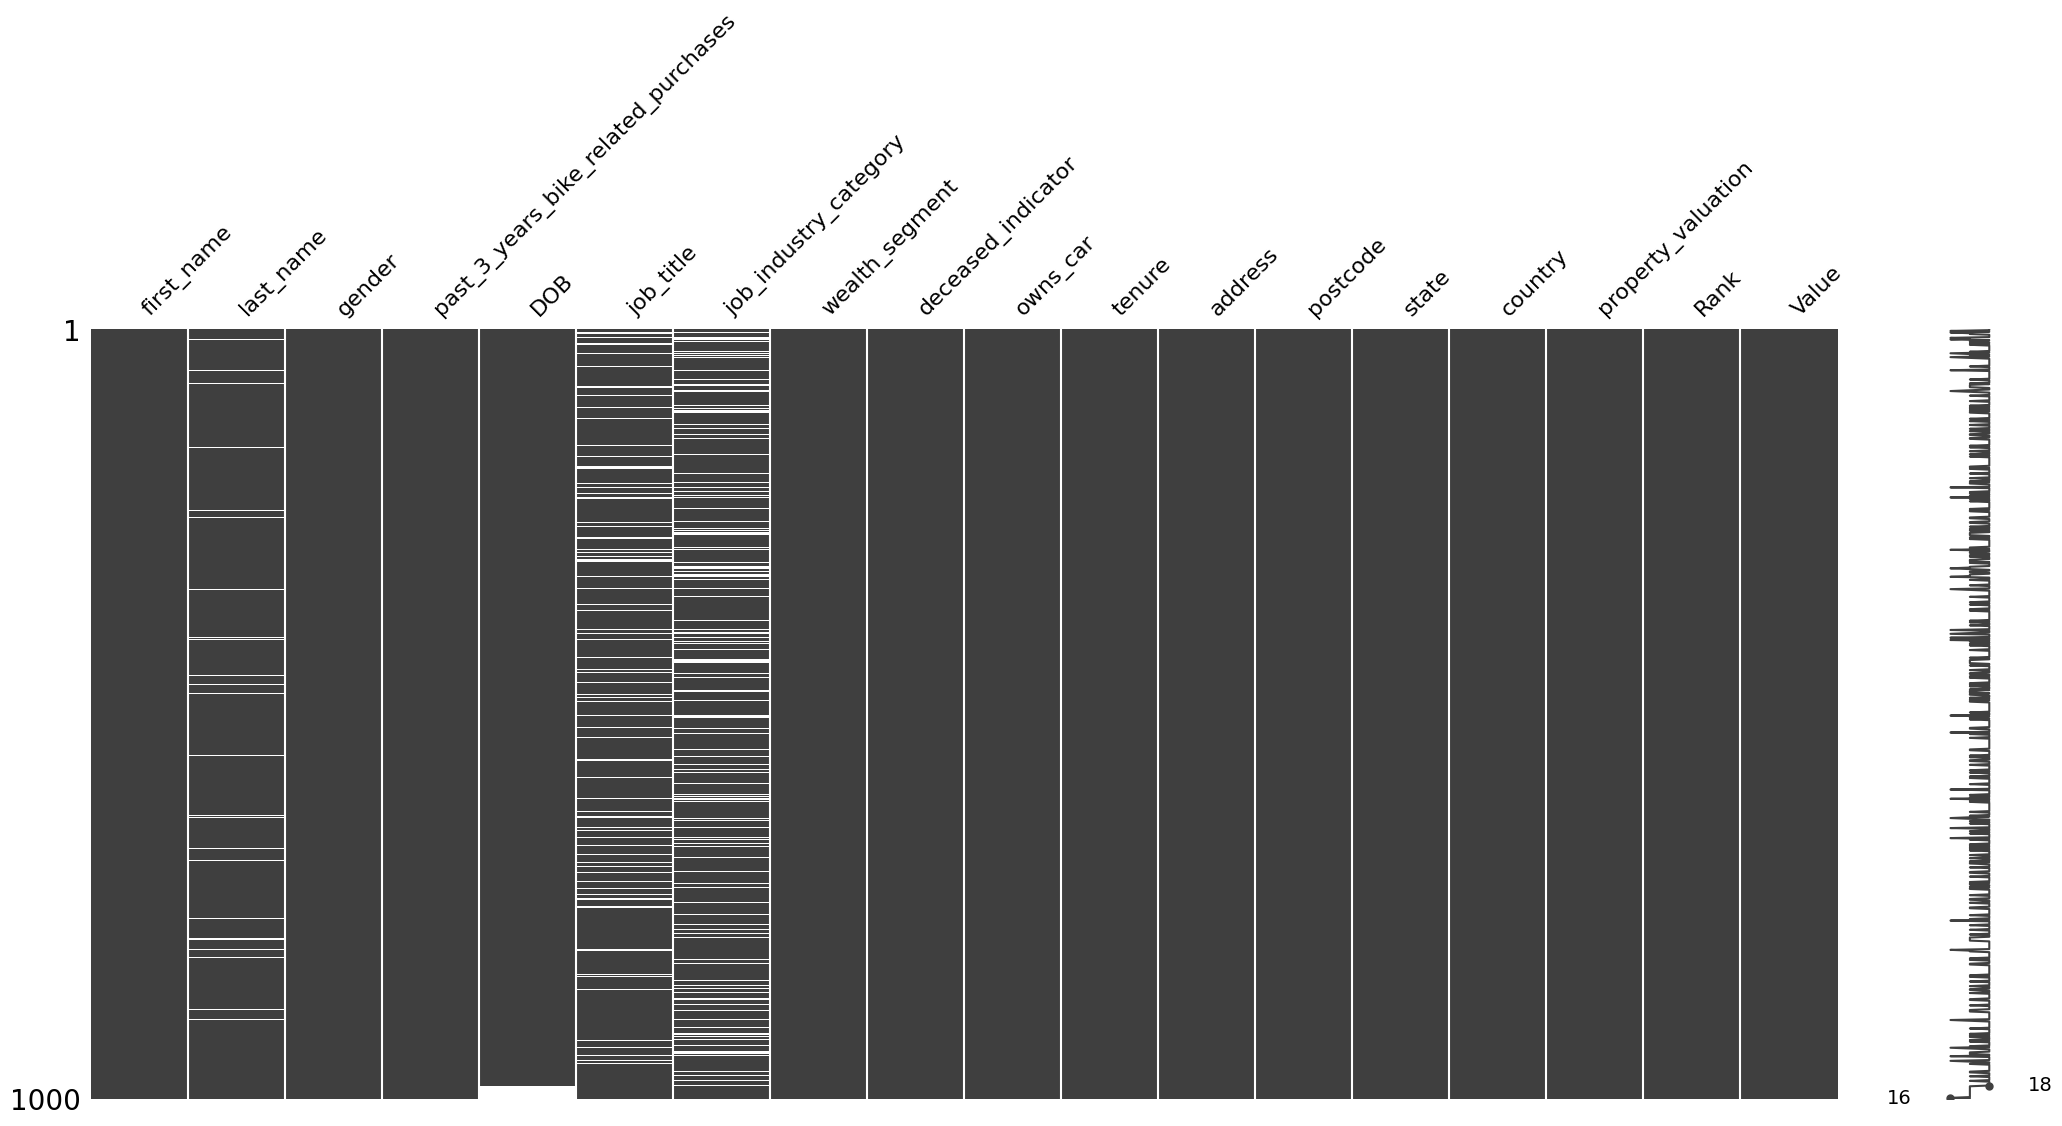

In [29]:
msno.matrix(df_customers.sort_values(by=['DOB']))
plt.plot

In [30]:
df_newcustomers_clean = df_customers.copy()

In [31]:
absent_data = ['job_title', 'job_industry_category', 'last_name']
df_newcustomers_clean[absent_data] = df_newcustomers_clean[absent_data].fillna('unspecified')
df_newcustomers_clean['last_name'].isna().sum()

0

In [32]:
df_newcustomers_clean = df_newcustomers_clean.dropna(subset = ['DOB'])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

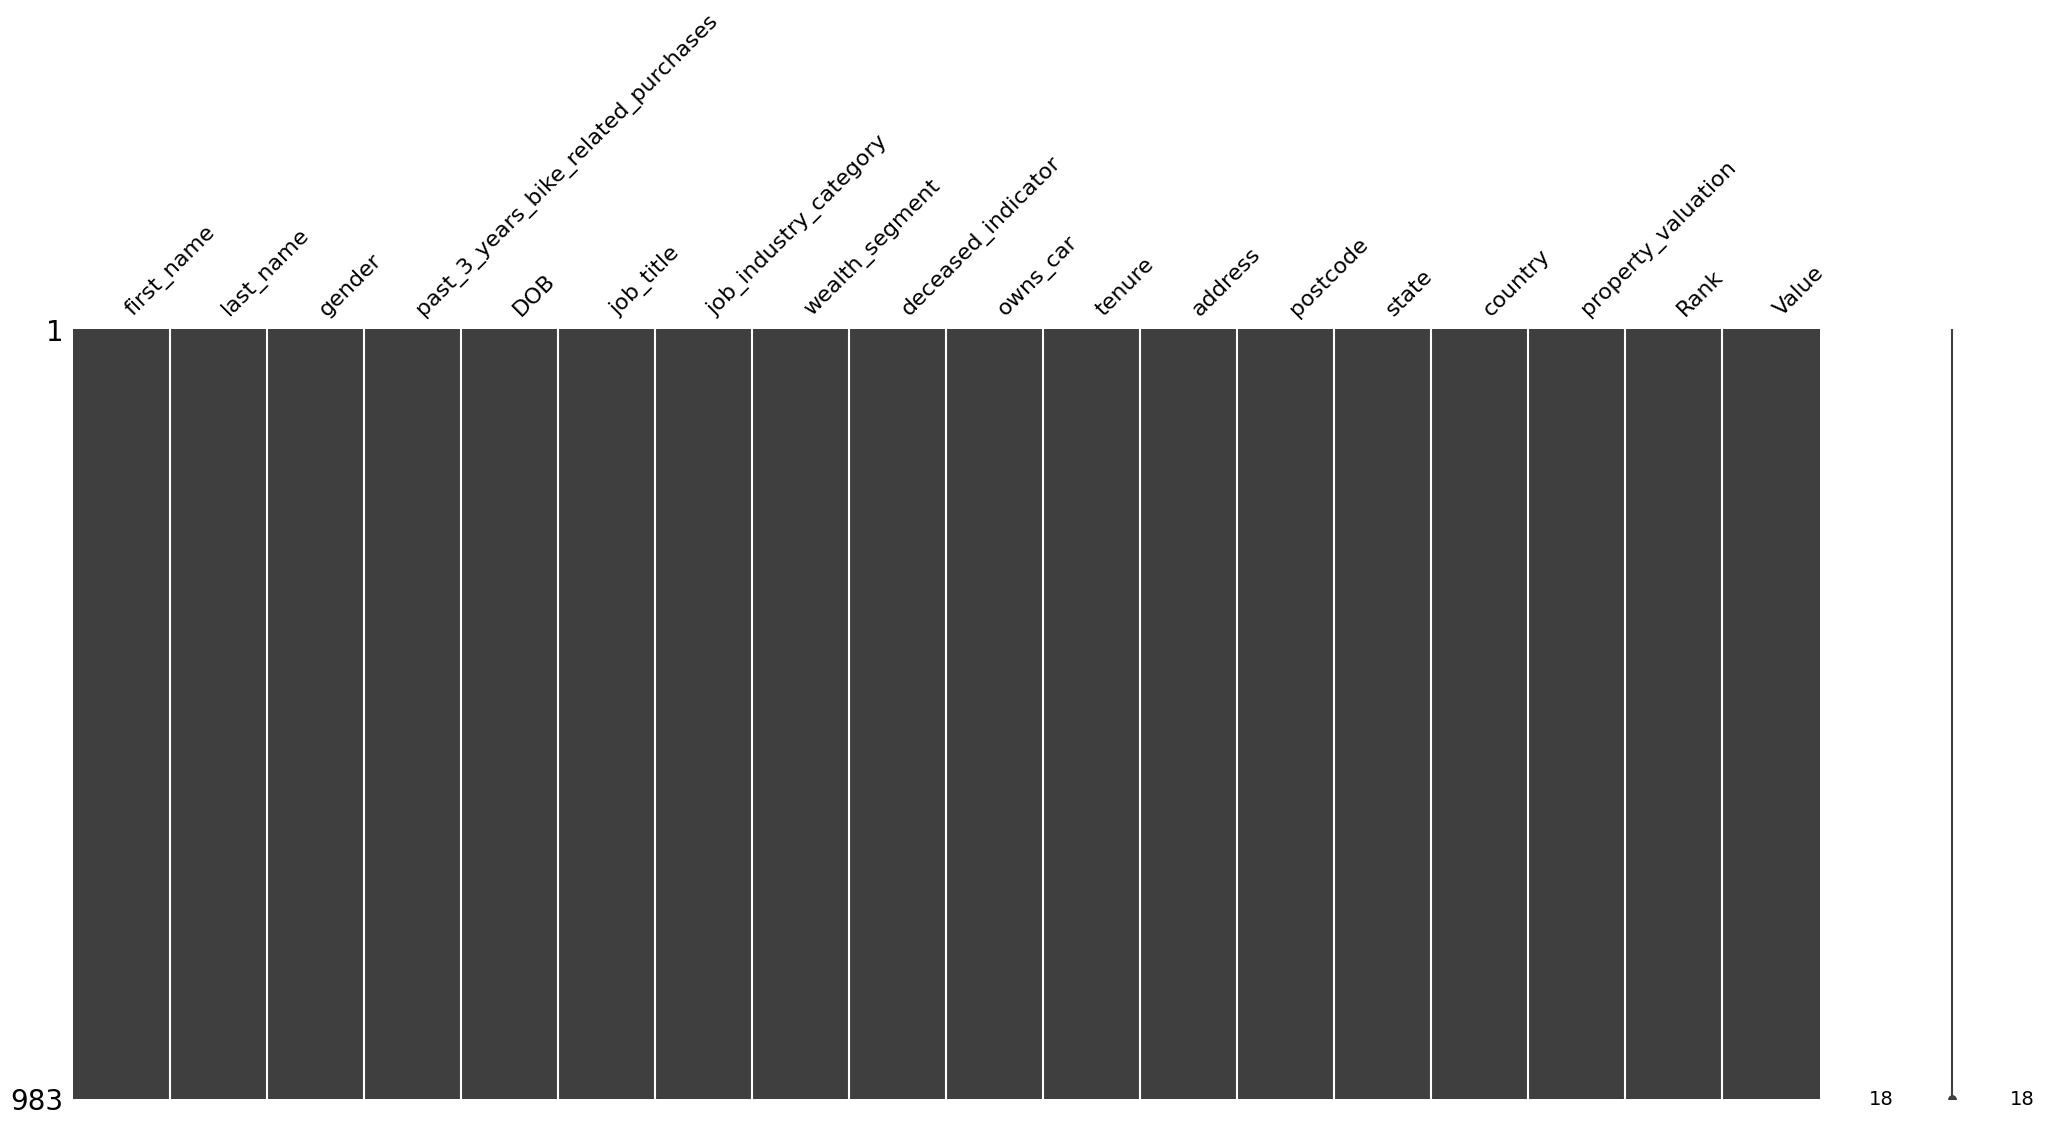

In [33]:
msno.matrix(df_newcustomers_clean.sort_values(by=['DOB']))
plt.plot

In [34]:
df_newcustomers_clean.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [35]:
df_customers['past_3_years_bike_related_purchases'].dtype

dtype('int64')

In [36]:
df_newcustomers_clean['Value'].value_counts()

0.637500    13
1.062500    12
0.892500     9
0.945625     9
1.237500     9
            ..
0.773500     1
0.605625     1
0.610938     1
0.770312     1
0.340000     1
Name: Value, Length: 324, dtype: int64

Report on New Customer table Data Quality Assessment:
* 1000 customers and don`t have any ID for them
* we don`t have DOB specified for 17 customers
* we have some columns with no names, but with some calculated values - removed

## Demographic

In [37]:
df_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [38]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [39]:
df_demographic.duplicated().sum()

0

In [102]:
df_demographic['last_name'].isna().sum()

125

In [71]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

* 4000 customers

In [103]:
df_demographic['customer_id'].duplicated().sum()

0

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

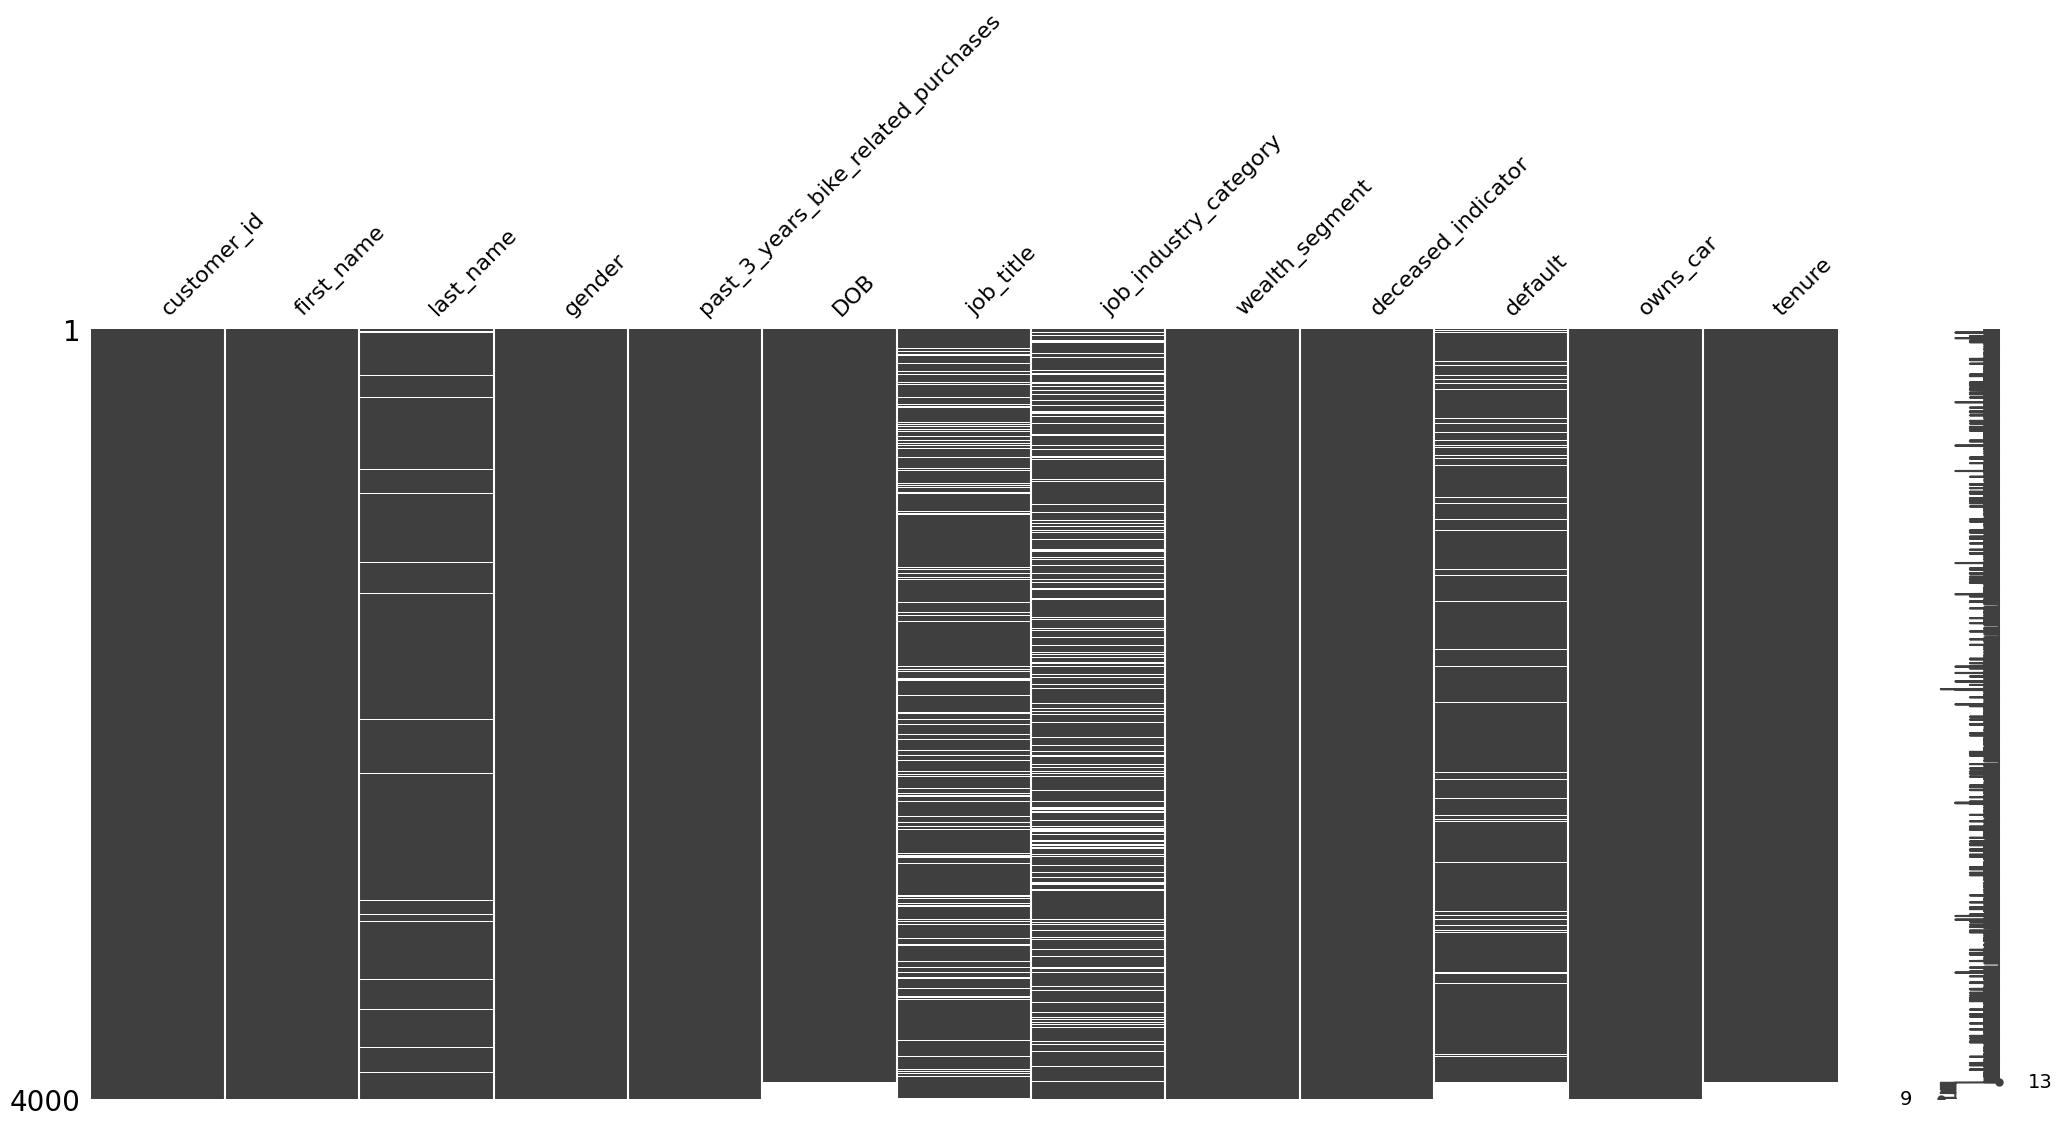

In [60]:
msno.matrix(df_demographic.sort_values(by=['DOB']))
plt.plot

In [44]:
df_demographic_clean = df_demographic.copy()

Gender represented by not allowable values, which I replaced with F/M/U

In [47]:
df_demographic_clean['gender'] = df_demographic_clean['gender'].replace(['Female', 'F', 'Femal'], 'F', regex=True)
df_demographic_clean['gender'] = df_demographic_clean['gender'].replace(['Male', 'M'], 'M', regex=True)

DOB doesn't match range constraint: its 1843-12-21 indicated. I removed everything before 1931 year and missing values (87 customers, for whom columns default and tenure also blanks) and 2 deceased customer also removed

In [84]:
df_demographic_clean = df_demographic_clean[(df_demographic_clean['DOB'] >= '1931')& (df_demographic_clean['deceased_indicator']=='N')]

In [85]:
df_demographic_clean['DOB'].max()

Timestamp('2002-03-11 00:00:00')

497 customers didn`t specify job_title and 656 customers didnt specify job_industry_category and 125 customers didnt specify last_name -> '*unspecified*'

In [72]:
df_demographic_clean['job_industry_category'].isna().sum()

656

In [73]:
blank_jobs_col = ['job_title','job_industry_category']
df_demographic_clean[blank_jobs_col] = df_demographic_clean[blank_jobs_col].fillna('unspecified')

In [75]:
df_demographic_clean['job_title'].isna().sum()

0

In [94]:
df_demographic_clean['tenure'].min()

1.0

In [76]:
df_demographic_clean.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

default column is wierd and thus remover

In [89]:
df_demographic_clean = df_demographic_clean.drop(['default'], axis=1)

In [100]:
blank_jobs_col = ['last_name', 'job_title', 'job_industry_category']
df_demographic_clean[blank_jobs_col] = df_demographic_clean[blank_jobs_col].fillna('unspecified')

In [101]:
df_demographic_clean['last_name'].isna().sum()

0

Report:
* 4000 distinct customers id in the dataset before cleaning
* no duplicated records
* Gender represented by not allowable values, which I replaced with F/M/U
* Missing data: 497 job_title, 656 job_industry_category, 125 last_name -> unspecified category
* DOB doesn't match range constraint: its 1843-12-21 indicated for 1 customer. I removed everything before 1931 year and missing values (87 customers, for whom columns default and tenure also blanks) and 2 deceased customer also removed
* default column is not interpretable, dropped

## CustomerAddress

In [107]:
df_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

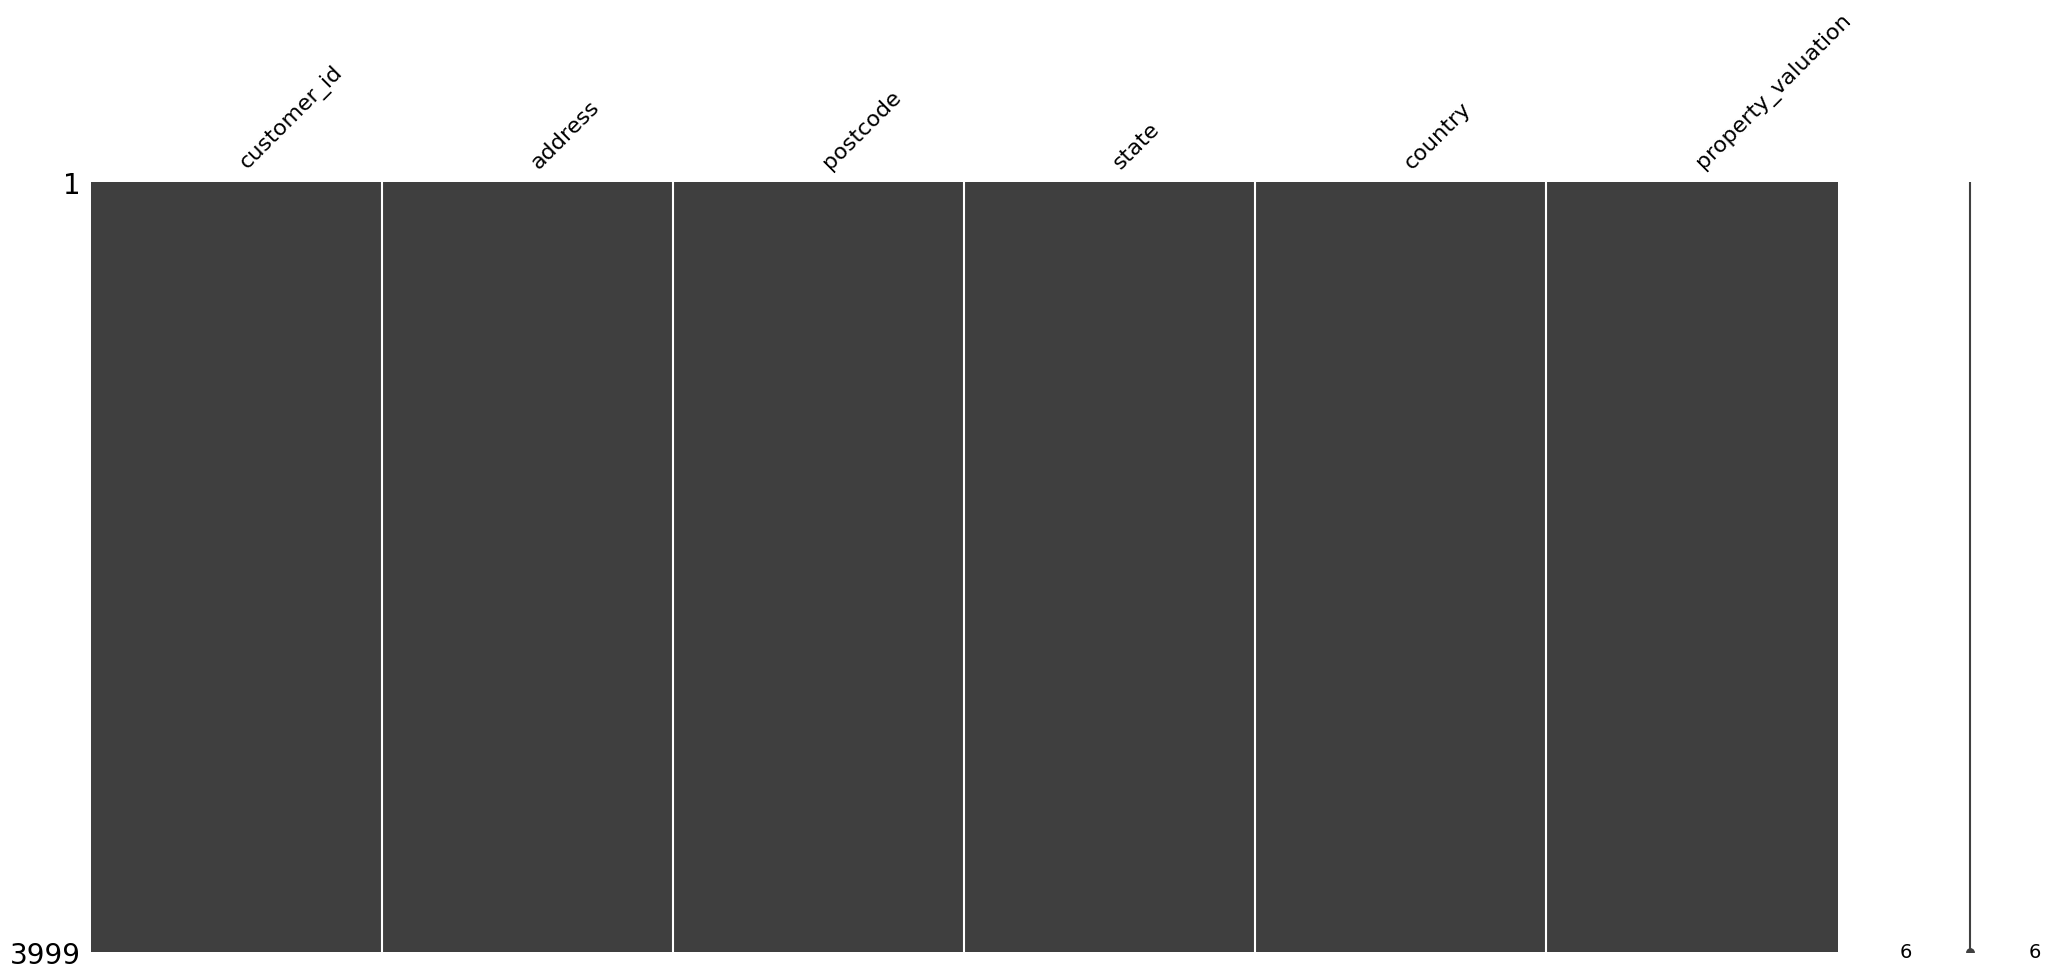

In [115]:
msno.matrix(df_address)
plt.plot

In [116]:
df_address.duplicated().sum()

0

We should rename states New South Wales with existing spelling NSW and Victoria with VIC

In [124]:
df_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [130]:
df_address_clean = df_address.copy()

In [131]:
states = {'New South Wales':'NSW',
          'Victoria':'VIC'}
df_address_clean['state'] = df_address_clean['state'].replace(states)

In [132]:
df_address_clean

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [133]:
df_address_clean['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

Merging datasets with Customer ID

In [136]:
df_merged = pd.merge(df_demographic_clean, df_address_clean, on='customer_id')
len(df_merged)

3906

In [137]:
df_merged = pd.merge(df_demographic, df_address, on='customer_id')
len(df_merged)

3996

In [8]:
df_demo_miss = df_demographic[~df_demographic['customer_id'].isin(df_address['customer_id'])]
df_address_miss = df_address[~df_address['customer_id'].isin(df_demographic['customer_id'])]
df_both_miss = pd.concat([df_demo_miss['customer_id'],
                          df_address_miss['customer_id']])
df_both_miss.unique()

array([   3,   10,   22,   23, 4001, 4002, 4003])

In [17]:
df_address_miss = df_address[~df_address['customer_id'].isin(df_demographic['customer_id'])]
df_address_miss

,customer_id,address,postcode,state,country,property_valuation
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


Report on Castomer address table Data Quality Assessment:

* There are 3999 customers with adderesses
* No duplicates
* no missing values
* renamed states New South Wales with existing spelling NSW and Victoria with VIC
* Comparing 2 datasets with customer_id we don`t have the following customer ID in address table: 3, 10,22,23, and the following in demographic table: 4001, 4002, 4003.
* lack of context on property_valuation column


## Report on Data Quality Assessment


**Transaction Table:**

*   The initial dataset contained 20,000 transactions from the year 2017.
*   No duplicate transactions were found, but missing values were present.
*   There are 101 distinct products, 6 brands with different attributes.
*   3,494 distinct customers were identified.
*   Some records lack clarity regarding product_first_sold_date.
*   358 records (2% of transactions) had unspecified online_status, which was filled as 'unspecified' for analysis.
*   197 records (1% of transactions) with missing product attributes were removed.
*   No column for quantity sold was observed.

**New Customer Table:**

*   The table includes 1,000 customers without assigned IDs.
*   17 customers lack specified dates of birth (DOB).
*   Columns without names containing calculated values were removed.

**Customers Demographic Table:**



*   Initially, 4,000 distinct customer IDs were present.
*   No duplicated records were found.
*   Gender values were replaced with F/M/U.
*   Missing data in job-related columns (job_title, job_industry_category, last_name) was filled with 'unspecified'.
*   DOB values before 1931 and inconsistent values were removed.
*   The unclear 'default' column was dropped.

**Customer Address Table:**

*   Addresses are available for 3,999 customers.
*   No duplicate records were identified.
*   No missing values were present.
*   State names were standardized (New South Wales to NSW, Victoria to VIC).
*   Differences in customer IDs between tables were noted (e.g., missing IDs: 3, 10, 22, 23, 4001, 4002, 4003).
*   The context of the property_valuation column is unclear.
*   Your valuable feedback and suggestions for further improvement are welcome.

# New Section